In [48]:
from sklearn.linear_model import LinearRegression  #used for regression and class
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [49]:
path = "Student_Performance.csv"
df = pd.read_csv(path)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [50]:
df.duplicated().sum()

np.int64(127)

In [51]:
df = df.drop_duplicates()

In [52]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [53]:
df.shape

(9873, 6)

In [54]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [55]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


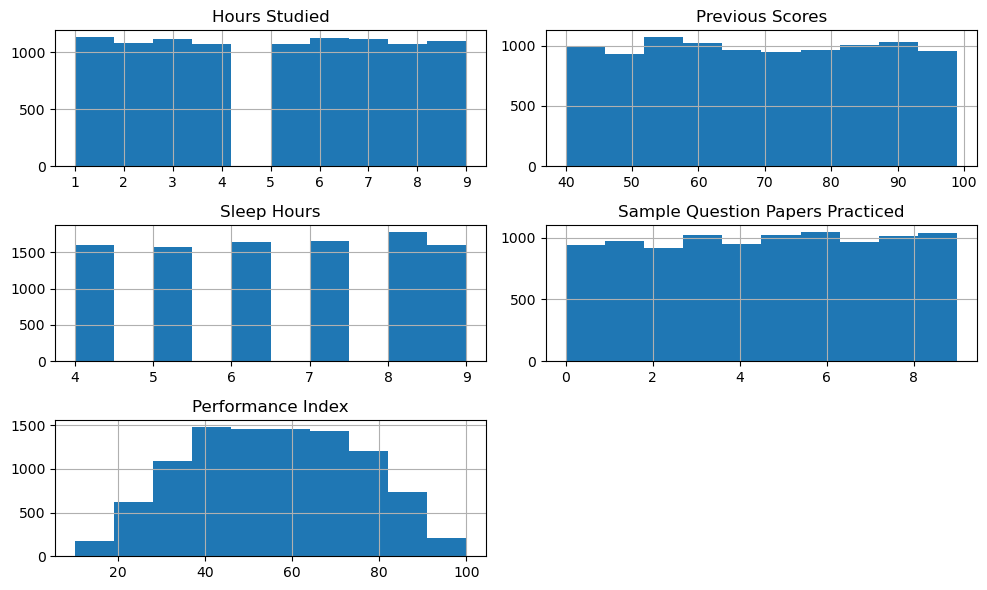

In [56]:
graph = df.select_dtypes(include=np.number).hist(figsize=(10,6))
plt.tight_layout()

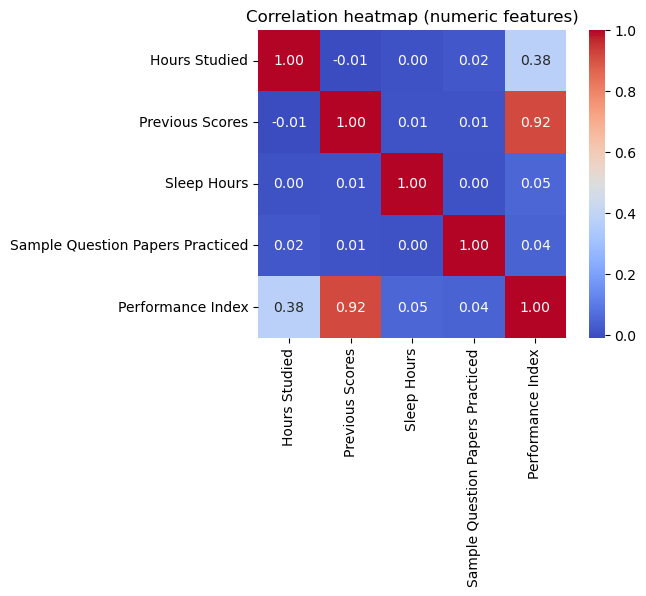

In [57]:
plt.figure(figsize=(6,4))
corr = df.select_dtypes(include=np.number).corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation heatmap (numeric features)")
plt.show()

### Data Preprocessing

In [58]:
target = "Performance Index"
x = df.drop(columns=[target]).copy()
y = df[target].astype(float)
cat_cols = x.select_dtypes(include=["object"]).columns.tolist()
cat_cols

['Extracurricular Activities']

In [60]:
encoding = pd.get_dummies(x, columns=cat_cols, drop_first=True, dtype=int)

print("Encoded shape:", encoding.shape)
encoding.head()

Encoded shape: (9873, 5)


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0


## Split the dataset into training and testing sets:
### Training set size: 80% of the data
### Testing set size: 20% of the data
### Random seed: 42 (to ensure reproducibility)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(
    encoding, y, test_size=0.2, random_state=42)

In [62]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
y_predection = model.predict(x_test)
mse  = mean_squared_error(y_test, y_predection)
rmse = np.sqrt(mse)
print(f"coefficients: {model.coef_}") #the (_) is mean private variable and this not functions
print(f"intercept: {model.intercept_}")
print(f"MSE: {mse:.2f}")
print(f"r-squared: {r2_score(y_test,y_predection):.2f}")
print(f"number of feature: {model.n_features_in_}")
print(f"RMSE: {rmse:.3f}")

coefficients: [2.8510219  1.01843034 0.47207329 0.18870366 0.57382297]
intercept: -33.98132449644058
MSE: 4.31
r-squared: 0.99
number of feature: 5
RMSE: 2.075


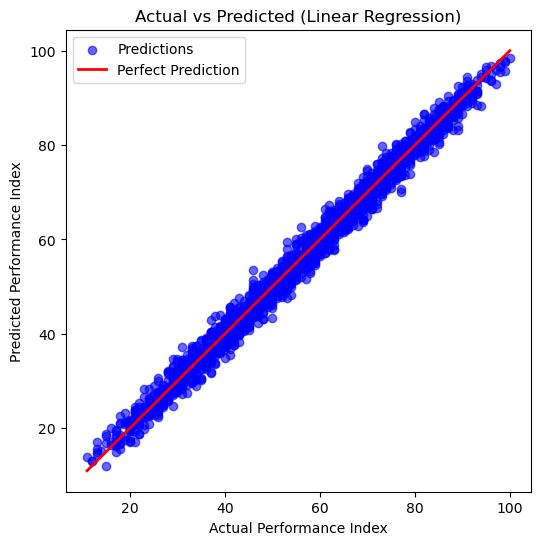

In [64]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_predection, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted (Linear Regression)")
plt.legend()
plt.show()